# Lab 2. Files and figures
#### Computational Methods for Geoscience - EPS 400/522
#### Instructor: Eric Lindsey
---------

When you are done with the lab, export it as an HTML or PDF file (File menu -> Save and export as), and turn it in along with your beautiful PDF map from question 5.

In [ ]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc

### Assignment 1: Ask the user for a number, then print the factorial of that number (Use np.math.factorial)

In [2]:
import numpy as np

number = input('Enter number here: ')

if '.' in number:
    print('ERROR: Integers Only')
elif number.isnumeric() == False:
    print('ERROR: Numbers Only')
else:
    number = int(number)
    print(np.math.factorial(number))

Enter number here:  90


1485715964481761497309522733620825737885569961284688766942216863704985393094065876545992131370884059645617234469978112000000000000000000000


### Assignment 2: Download and read in a csv file of recent earthquakes

Go to https://earthquake.usgs.gov/earthquakes/search/ and conduct a search of your choice, but make sure it contains at least 1 magnitude 7 or larger event.

Under 'output options' change the format to 'CSV', it should download directly to your computer.

Now, read this file into python using Pandas, and print out just the 'time', 'latitude', 'longitude', 'depth' and 'mag' columns, for only the earthquakes over magnitude 7.

Hint: if you have a pandas data frame with lots of columns and only want to print some, you can give a list of just the ones you want to print like so:

    print(data['col1','col2','col3'])

In [3]:
import pandas as pd

file = './lab2_earthquake_query_larger.csv'
eq_data = pd.read_csv(file)

trim_eq_data = eq_data[['time','latitude','longitude','depth','mag']] # Pulls only the parameters we care about

index_list = [] # Creates an empty index list to avoid nesting for loops

for index, row in trim_eq_data.iterrows():
    if row['mag'] >= 7: # Printing row directly is fine but yielded an ugly result by default so I came up with this solution that
        index_list.append(index) # Prints the whole row directly from the dataframe without having converted it to a row object

for index in index_list:
    print(trim_eq_data.iloc[[index]])

                         time  latitude  longitude    depth  mag
462  2023-08-28T19:55:31.821Z   -6.7876    116.548  513.545  7.1


### Assignment 3: plotting earthquakes

Plot the earthquakes from your USGS query above. The X and Y axes of the plot should be longitude and latitude, but you can choose how to represent depth, magnitude, time, etc. (choose at least 1 of these to represent). You could use color, marker size, 3D heights, etc. Don't go too crazy, but have fun! Take a look at some demos here, maybe copy one you like and modify it to your use: https://matplotlib.org/stable/gallery/index.html

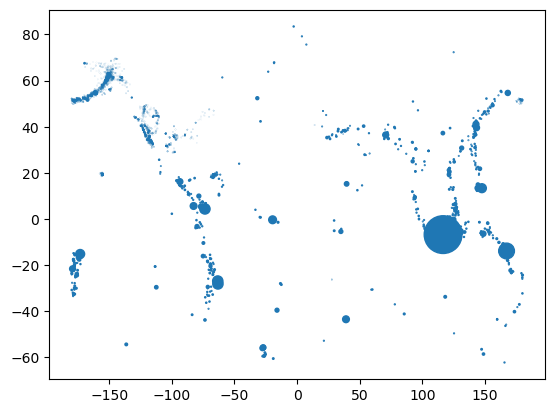

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = './lab2_earthquake_query_larger.csv'
eq_data = pd.read_csv(file)

fig, ax = plt.subplots()

lon_list = eq_data['longitude']
lat_list = eq_data['latitude']

mag_list = eq_data['mag'].tolist()
mag_list_scale = []
for mag in mag_list:
    scaled_mag = mag ** mag / 1500
    mag_list_scale.append(scaled_mag)
    

ax.scatter(x=lon_list,
           y=lat_list,
           s=mag_list_scale)


plt.show()

### Assignment 4: Working with datetime

Plot the earthquake magnitudes from your query over time, making sure to take care of the 'datetime' formatting of both the data and the x-axis of the plot.

Hint: import the module 'datetime' and then use the function datetime.datetime.strptime() to convert the string-formatted dates into datetime objects.

This one may be tricky - use chatgpt or the datetime documentation to help!

<class 'pandas.core.series.Series'>
2023-08-31T18:28:56.536Z


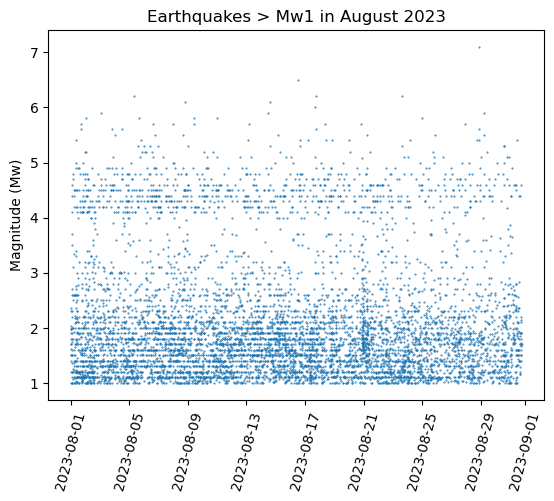

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = './lab2_earthquake_query_larger.csv'
eq_data = pd.read_csv(file)

mag_test = eq_data['mag']
print(type(mag_test))

mag_list = eq_data['mag'].tolist()
time_list = eq_data['time'].tolist()

time_list_fixed_format = [] # Default format from the CSV breaks datetime so this is just a quick dirty fix to remove characters that's breaking it

print(time_list[0])

for time in time_list:
    time_fix_1 = time.replace("T", " ")
    time_fix_2 = time_fix_1.replace("Z", "")
    time_fix_3 = time_fix_2[:-4]
    time_list_fixed_format.append(time_fix_3)

format = '%Y-%m-%d %H:%M:%S' # Format for the times in time_list_fixed_format, used in datetime.datetime.strptime
                    
date_times = []
for time in time_list_fixed_format:
    date_times.append(dt.datetime.strptime(time, format))
    
fig, ax = plt.subplots()
ax.scatter(x=date_times,
           y=mag_list,
           s=0.2)

xticks=ax.get_xticks() # Rotates the ticks to 75 degrees from horizontal so they're legible
plt.xticks(xticks, visible=True, rotation=75)

ax.set_title('Earthquakes > Mw1 in August 2023')
ax.set_ylabel('Magnitude (Mw)')

plt.show()    

### Assignment 5: Make a beautiful SST plot
Download the full monthly timeseries of sea surface temperatures from 1891 to present ('sst.mon.mean.nc', 156 MB) from https://downloads.psl.noaa.gov/Datasets/COBE/.

Create a beautiful plot of last month's SST map, and use plt.savefig() to save it as a PDF to turn in alongside the lab. I will share my favorite next week - use creative colorschemes, plotting methods, or anything else unexpected!


<class 'netCDF4._netCDF4.Dataset'>
<class 'netCDF4._netCDF4.Variable'>
<class 'numpy.ma.core.MaskedArray'>


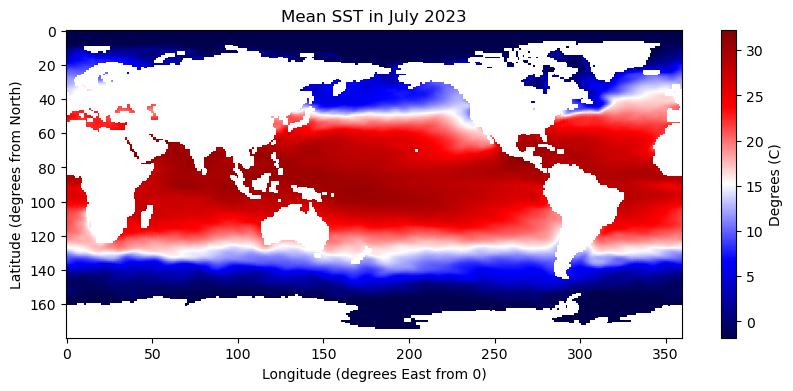

In [16]:
import netCDF4 as nc
import matplotlib.pyplot as plt

filename = 'sst.mon.mean.nc'
dataset = nc.Dataset(filename)

print(type(dataset))

def months_since_1891(year, month):
    calendar_dict = {
        "January": [1, 31],
        "February": [2, 28],
        "March": [3, 31],
        "April": [4, 30],
        "May": [5, 31],
        "June": [6, 30],
        "July": [7, 31],
        "August": [8, 31],
        "September": [9, 30],
        "October": [10, 31],
        "November": [11, 30],
        "December": [12, 31]
    }
    
    years_passed = year - 1891
    months_in_year = calendar_dict[month][0]
    months_passed = (years_passed * 12) + months_in_year - 2 # -1 for 0 indexing fix
    
    return months_passed

current_month = months_since_1891(2023, "July")

# You know upon reflection, I could've just set the index to -1...

sst_test = dataset['sst']
print(type(sst_test))

sst = dataset['sst'][current_month,:,:]

sst = dataset['sst'][-1,:,:]

print(type(sst))

plt.figure(figsize=(10,4))
plt.imshow(sst, cmap="seismic")
plt.colorbar(cmap="seismic",
             label="Degrees (C)")
plt.ylabel('Latitude (degrees from North)')
plt.xlabel('Longitude (degrees East from 0)')

plt.title('Mean SST in July 2023')
plt.savefig('HW2_Question_5.pdf')
plt.show()

### Assignment 6. Interactive SST plot

Create an interactive plot of the whole SST timeseries, with a slider that allows you to scan through time. Make sure the title of the plot always reflects the month and year currently displayed (you'll have to work with the 'time' component of the NetCDF file. It is expressed as "days since 1891-01-01", so you will need to convert this into a nicer format. Check out the end of the matplotlib-help file for a clue on this!

Also, it may be clearer if you set the colorbar to have a fixed range so you can more easily see changes in the temperature over time. Use plt.clim() or ax.set_clim().

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from ipywidgets import interactive

def months_since_1891(month, year):
    calendar_dict = {
        "January": [1, 31],
        "February": [2, 28],
        "March": [3, 31],
        "April": [4, 30],
        "May": [5, 31],
        "June": [6, 30],
        "July": [7, 31],
        "August": [8, 31],
        "September": [9, 30],
        "October": [10, 31],
        "November": [11, 30],
        "December": [12, 31]
    }
    
    years_passed = year - 1891
    months_in_year = calendar_dict[month][0]
    months_passed = (years_passed * 12) + months_in_year - 2 # -1 for 0 indexing fix
    
    return months_passed

def plot_sst(month="July",year=2023):
    filename = 'sst.mon.mean.nc'
    sst_data = nc.Dataset(filename)
   
    month_index = months_since_1891(month, year)
    
    print(month_index)

    sst = sst_data['sst'][month_index,:,:]

    plt.figure(figsize=(10,4))
    plt.imshow(sst, cmap="seismic")
    plt.colorbar(cmap="seismic",
                 label="Degrees (C)")
    plt.ylabel('Latitude (degrees from North)')
    plt.xlabel('Longitude (degrees East from 0)')

    plt.title(f'Mean SST in {month} {year}')
    plt.show()
    plt.savefig('HW2_Question_5.pdf',
                format='pdf')


months_list = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    
w = interactive(plot_sst, month=months_list, year=(1891, 2023, 1))
display(w)

interactive(children=(Dropdown(description='month', index=6, options=('January', 'February', 'March', 'April',…